In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./local_rewards_costs.xls')
# data = data.dropna()
data.head()

,Time stamp,Actual reward,Expected reward,Actual cost: dist,Actual cost: turn,Actual cost: trav,Actual cost: real_time,Expected cost: dist,Expected cost: turn,Expected cost: trav,Actual path length,Expected path length
0,98.944,755.865601,708.594727,0.157952,0.166486,0.002498,3.800,0.561640,0.028735,0.044737,0.157965,0.562572
1,103.020,530.147095,772.204041,0.542130,1.014734,0.022676,4.076,0.760975,1.949590,0.042508,0.544812,0.762858
2,107.096,1301.541992,1518.950684,2.094155,1.142154,0.169129,4.076,1.758069,1.620812,0.165490,2.096272,1.761223
3,110.204,830.249390,1081.960449,1.215310,0.215479,0.131817,3.108,0.454643,2.529335,0.009838,1.217661,0.455581
4,110.204,881.824585,1165.762817,0.924334,0.071453,0.107215,0.000,0.434996,2.791577,0.021403,0.926096,0.435511


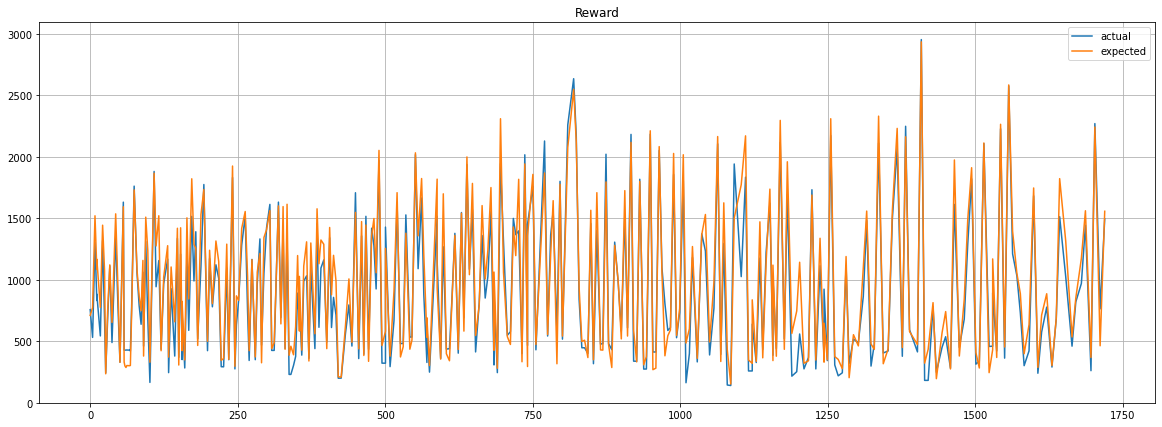

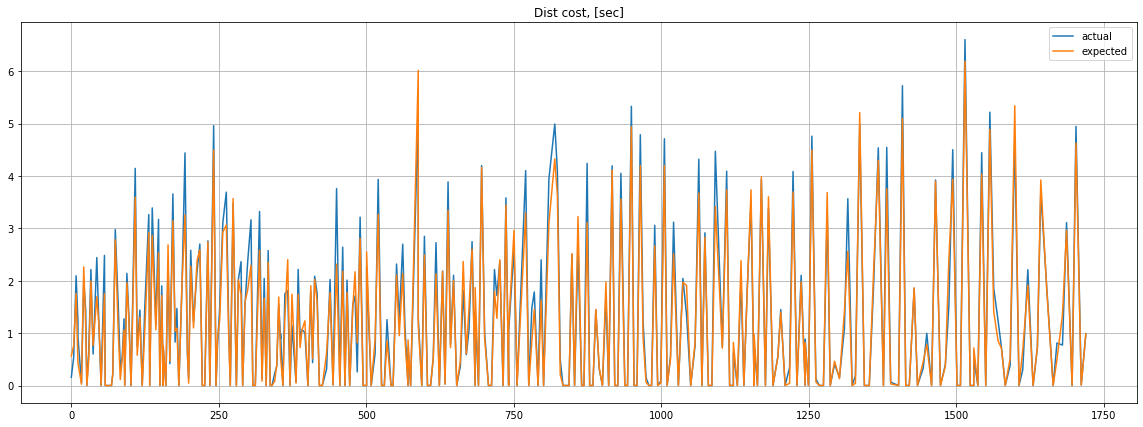

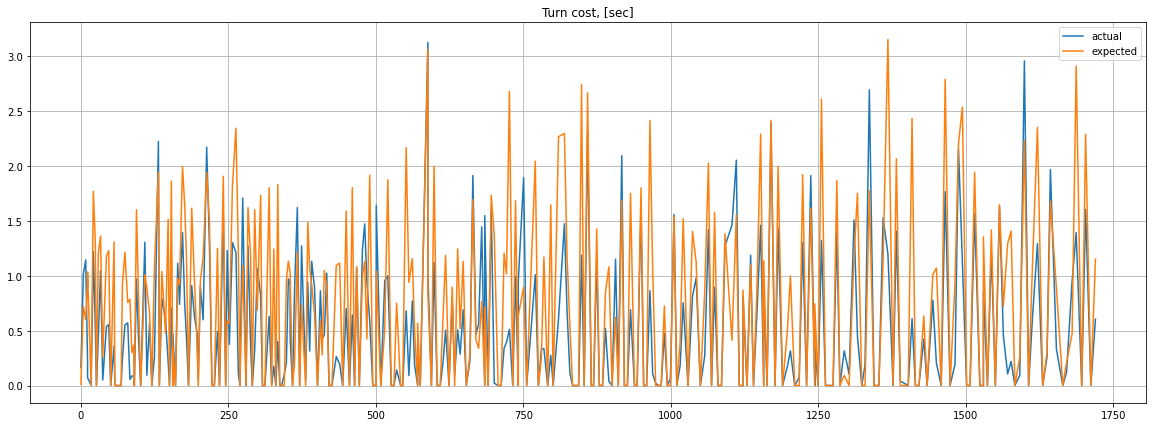

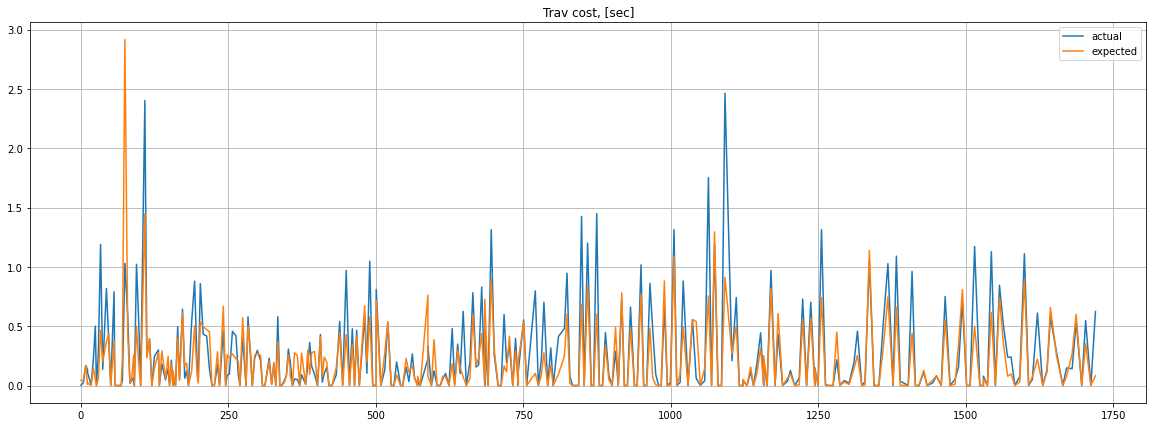

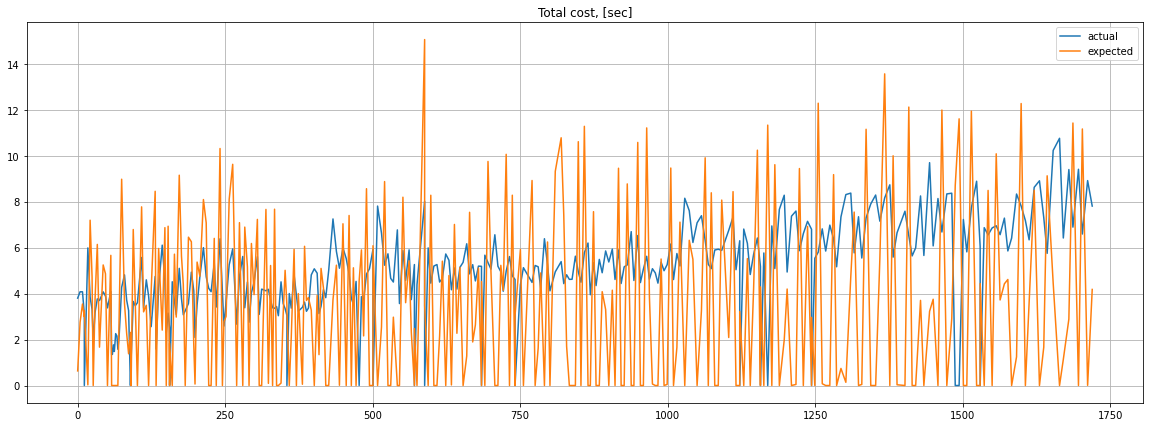

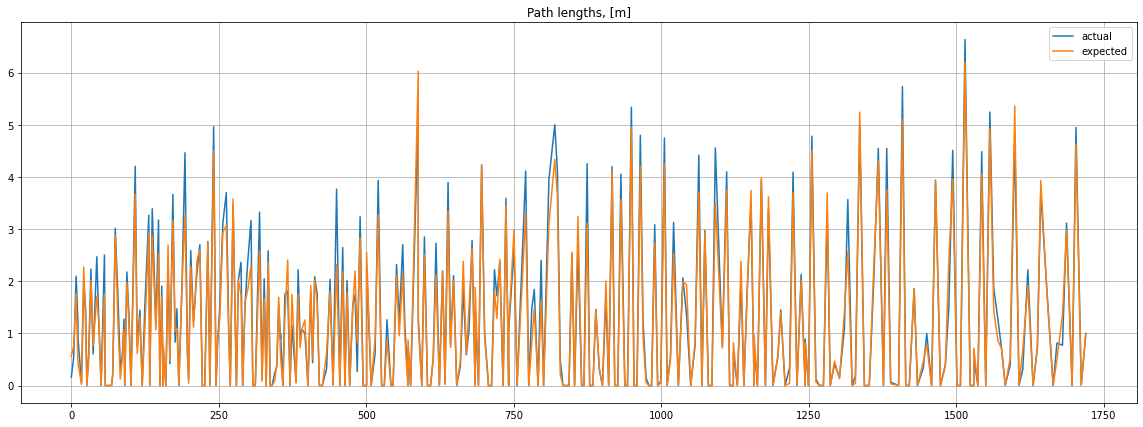

In [7]:
t = data["Time stamp"] - data["Time stamp"][0]

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual reward"], label='actual')
plt.plot(t, data["Expected reward"], label='expected')
plt.title("Reward")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: dist"], label='actual')
plt.plot(t, data["Expected cost: dist"], label='expected')
plt.title("Dist cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: turn"], label='actual')
plt.plot(t, 0.37*data["Expected cost: turn"], label='expected')
plt.title("Turn cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: trav"], label='actual')
plt.plot(t, data["Expected cost: trav"], label='expected')
plt.title("Trav cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: real_time"], label='actual')
total_expected_cost = data["Expected cost: dist"]+data["Expected cost: turn"]+data["Expected cost: trav"]
plt.plot(t, total_expected_cost, label='expected')
plt.title("Total cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual path length"], label='actual')
plt.plot(t, data["Expected path length"], label='expected')
plt.title("Path lengths, [m]")
plt.grid()
plt.legend();

In [4]:
actual_cost = np.array(data["Actual cost: turn"])
expected_cost = np.array(data["Expected cost: turn"])
ratios = actual_cost / (expected_cost+1e-6)
ratios = ratios[ratios!=0]
ratios = ratios[ratios < 1000]
print(f'Mean Actual / Expected turn costs ratio: {ratios.mean()}')

Mean Actual / Expected turn costs ratio: 0.37085853797333723


In [5]:
ratios.min(), ratios.max()

(0.005580676840846883, 10.877847671508787)